# Dataset1: I) Dataset Preparation

### Importation of all the libraries needed

In [1]:

import pandas as pd
import plotly
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import types

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, r2_score, mean_squared_error
from sklearn.cluster import KMeans
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline


### Load csv file

In [4]:
df_data_2 = pd.read_csv("datasets/telco.csv")
df_data_1 = pd.read_csv("datasets/churn.csv")
df_data_1.head()


State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [5]:
customers = df_data_1


### the dataset as 2666 recors and 20 variables

In [7]:
customers.shape

(2666, 20)

In [6]:
#Statistical approach of the different variables
customers.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     2666.000000  2666.000000            2666.000000         2666.00000   
mean       100.620405   437.438860               8.021755          179.48162   
std         39.563974    42.521018              13.612277           54.21035   
min          1.000000   408.000000               0.000000            0.00000   
25%         73.000000   408.000000               0.000000          143.40000   
50%        100.000000   415.000000               0.000000          179.95000   
75%        127.000000   510.000000              19.000000          215.90000   
max        243.000000   510.000000              50.000000          350.80000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      2666.000000       2666.000000        2666.000000      2666.000000   
mean        100.310203         30.512404         200.386159       100.023631   
std          19.988162          9.215733          50.951515        20.161445   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.380000         165.300000        87.000000   
50%         101.000000         30.590000         200.900000       100.000000   
75%         114.000000         36.700000         235.100000       114.000000   
max         160.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       2666.000000          2666.000000        2666.000000   
mean          17.033072           201.168942         100.106152   
std            4.330864            50.780323          19.418459   
min            0.000000            43.700000          33.000000   
25%           14.050000           166.925000          87.000000   
50%           17.080000           201.150000         100.000000   
75%           19.980000           236.475000         113.000000   
max           30.910000           395.000000         166.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         2666.000000         2666.000000       2666.000000   
mean             9.052689           10.237022          4.467367   
std              2.285120            2.788349          2.456195   
min              1.970000            0.000000          0.000000   
25%              7.512500            8.500000          3.000000   
50%              9.050000           10.200000          4.000000   
75%             10.640000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        2666.000000             2666.000000  
mean            2.764490                1.562641  
std             0.752812                1.311236  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.750000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
State                     2666 non-null object
Account length            2666 non-null int64
Area code                 2666 non-null int64
International plan        2666 non-null object
Voice mail plan           2666 non-null object
Number vmail messages     2666 non-null int64
Total day minutes         2666 non-null float64
Total day calls           2666 non-null int64
Total day charge          2666 non-null float64
Total eve minutes         2666 non-null float64
Total eve calls           2666 non-null int64
Total eve charge          2666 non-null float64
Total night minutes       2666 non-null float64
Total night calls         2666 non-null int64
Total night charge        2666 non-null float64
Total intl minutes        2666 non-null float64
Total intl calls          2666 non-null int64
Total intl charge         2666 non-null float64
Customer service calls    2666 non-null int64


# II) Data Analysis

In [14]:
# It can be interesting for bouygues to know the worst performing states 
n_by_state = customers.groupby("State")["Churn"].sum().reset_index(name='Churn Sum')
count_by_state = customers.groupby("State")["Churn"].count().reset_index(name='Churn Count')
df_final = n_by_state.merge(count_by_state, on='State', how='left')
df_final['% of Churn per State'] = ((df_final['Churn Sum'] / df_final['Churn Count'])*100).round(0)
print(df_final.head(50))

   State  Churn Sum  Churn Count  % of Churn per State
0     AK          3           43                   7.0
1     AL          7           66                  11.0
2     AR         11           47                  23.0
3     AZ          3           45                   7.0
4     CA          5           24                  21.0
5     CO          7           59                  12.0
6     CT         11           59                  19.0
7     DC          5           45                  11.0
8     DE          8           51                  16.0
9     FL          7           54                  13.0
10    GA          8           49                  16.0
11    HI          2           44                   5.0
12    IA          3           38                   8.0
13    ID          5           56                   9.0
14    IL          4           45                   9.0
15    IN          6           54                  11.0
16    KS         10           52                  19.0
17    KY  

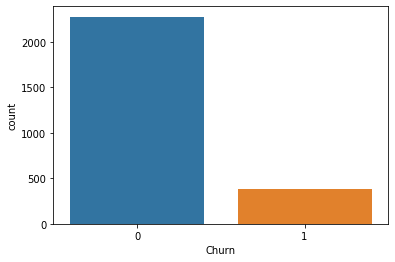

In [15]:
#Lets display the churn output
sns.countplot(customers['Churn'])

### Worst offender states in terms of churn

In [10]:
# first the company has to dive deep into the result of the 5 states that are not performing well 
df_final.sort_values(by='% of Churn per State', ascending=False).head(5)

State  Churn Sum  Churn Count  % of Churn per State
43    TX       16.0           55                  29.0
31    NJ       14.0           50                  28.0
20    MD       14.0           60                  23.0
25    MS       11.0           48                  23.0
2     AR       11.0           47                  23.0

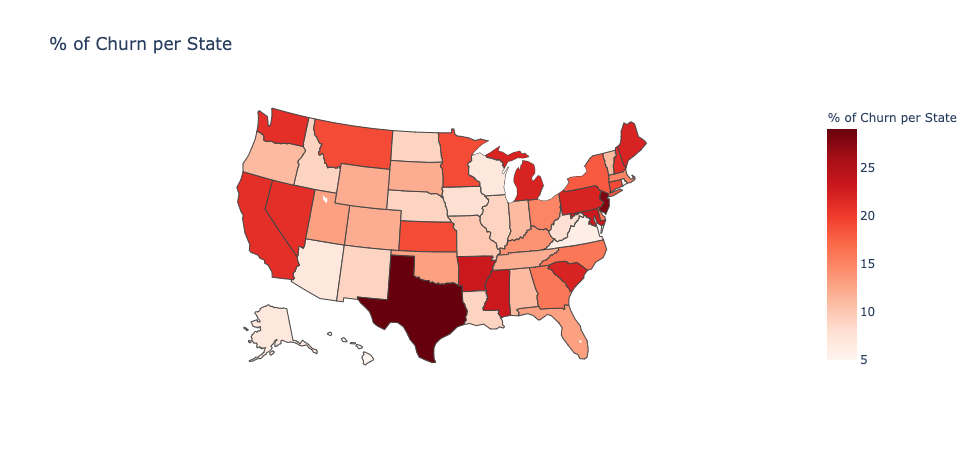

In [11]:
import plotly.graph_objects as go

# Load data frame and tidy it.
import pandas as pd

#n_by_state
fig = go.Figure(data=go.Choropleth(
    locations=df_final['State'], # Spatial coordinates
    z = df_final['% of Churn per State'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "% of Churn per State",
))

fig.update_layout(
    title_text = '% of Churn per State',
    geo_scope='usa'
)

fig.show()

### Corrolation between all variables

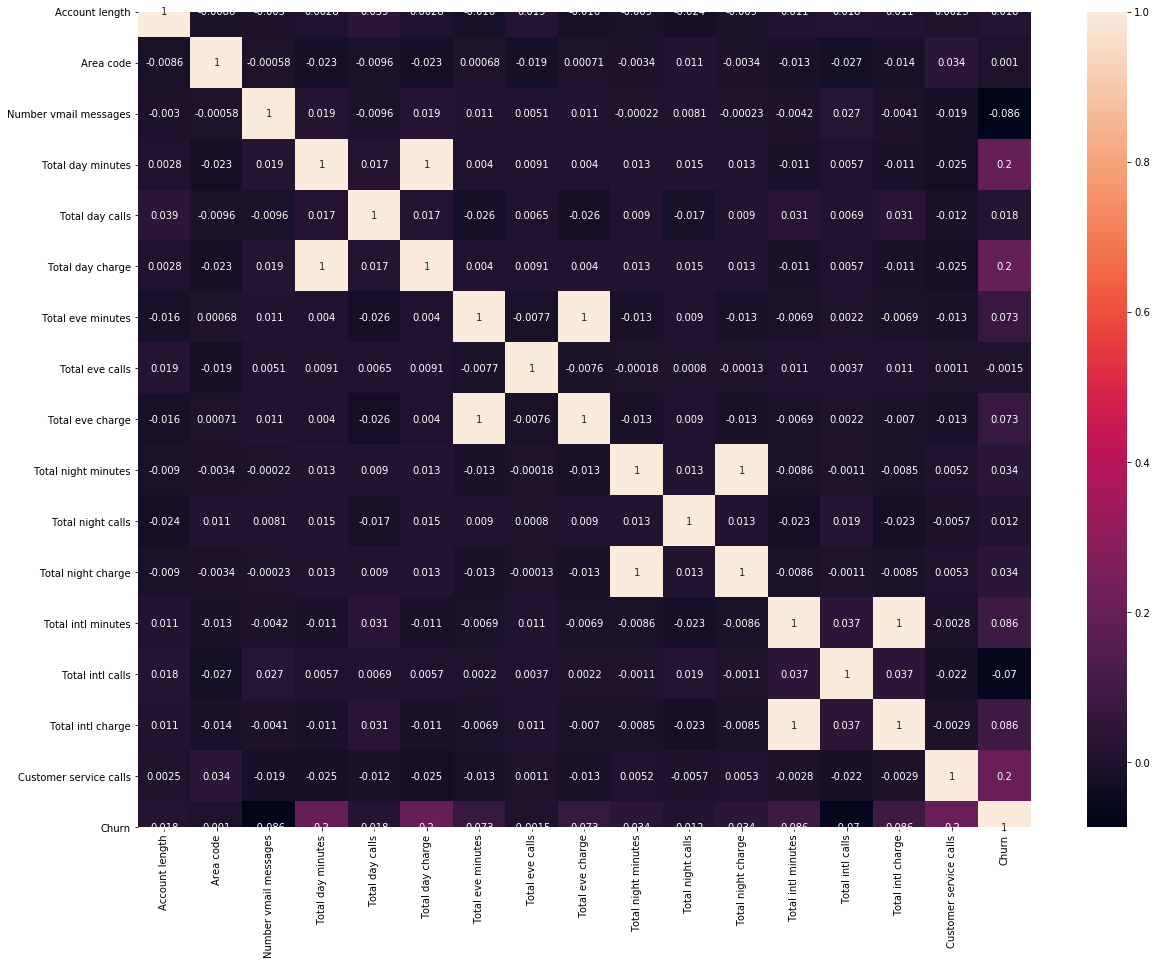

In [21]:
plt.subplots(figsize=(20,15))
sns.heatmap(customers.corr(),annot=True)

In [22]:
customers['id'] = np.arange(len(customers))

In [23]:
new_customer_table = customers[['id', 'Account length', 'Area code', 'Number vmail messages', 'Total day minutes','Total day calls','Total day charge','Total eve minutes','Total eve charge','Total night minutes','Total night calls','Total night charge','Total intl minutes','Total intl calls','Total intl charge','Customer service calls','Churn']]

In [24]:
new_customer_table["Area code"].unique()

array([415, 408, 510])

In [25]:
area_dummies = pd.get_dummies(new_customer_table["Area code"], prefix="area", drop_first=1)
data = pd.concat([new_customer_table.drop("Area code", 1), area_dummies ], 1).set_index("id")

In [26]:
data.dtypes

Account length              int64
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                       int64
area_415                    uint8
area_510                    uint8
dtype: object

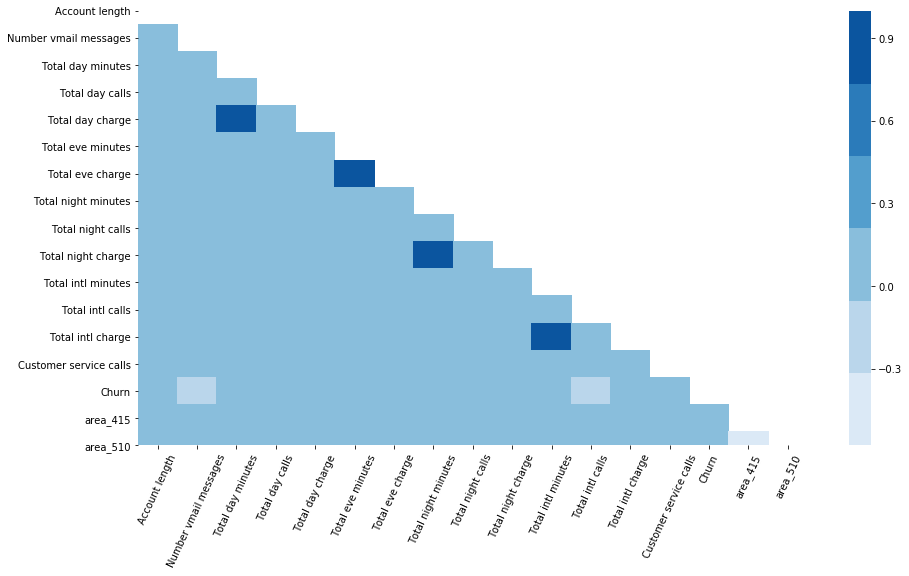

In [27]:
data_corr = data.corr()
fig, ax = plt.subplots(figsize=(15,8))
mask = np.zeros_like(data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(data_corr, mask=mask, cmap=sns.color_palette("Blues"))
ax.set_facecolor('white')
plt.xticks(rotation=65)
plt.show()


'Churn' does not seem to be highly correlated with our variables. 
<br> We may have some correlation issues on some variables: *Total Intl minutes* and *Total intl charge*.
'Total [...] charge' and 'Total [...] minutes' basically bring in the same information. Let's focus on the first because it bring us a concrete business information: how much money does customer X spend on something.

Let's plot our new correlations. This time we focus on on the [-0.6,0.6] range, because all high correlations have been removed.

In [31]:
data = data.drop(data.columns[data.columns.str.contains("minutes")],1)

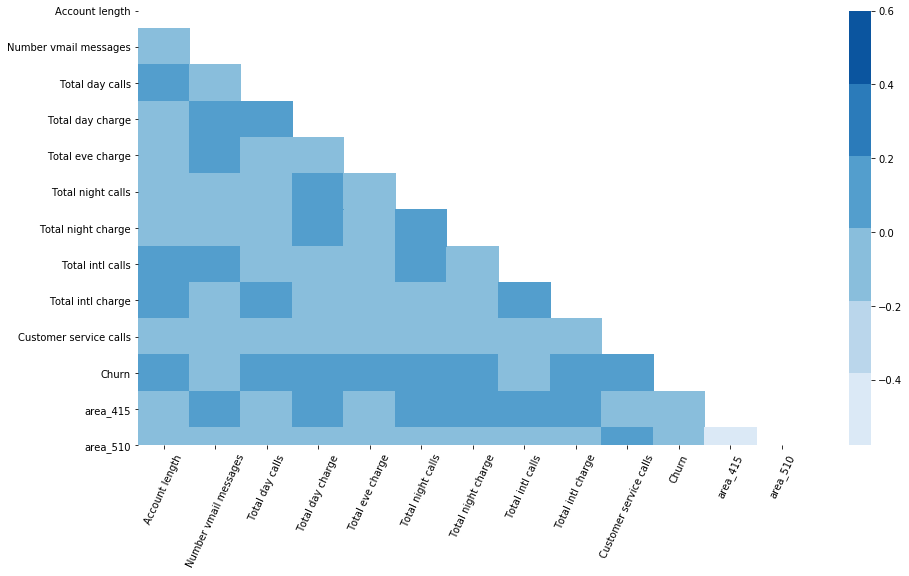

In [32]:
data_corr = data.corr()
fig, ax = plt.subplots(figsize=(15,8))
mask = np.zeros_like(data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(data_corr, mask=mask, cmap=sns.color_palette("Blues"), vmax=0.6)
ax.set_facecolor('white')
plt.xticks(rotation=65)
plt.show()

No high correlation between our predictors. 
<br> The churn correlations seem a bit counter-intuitive. Let's dig in this. 

### the explanatory variables for the churn : total day charge, total internation min, customer call service

In [33]:
#Lets change the bolean churn into integer
customers['Churn'] = customers['Churn'].astype(int)

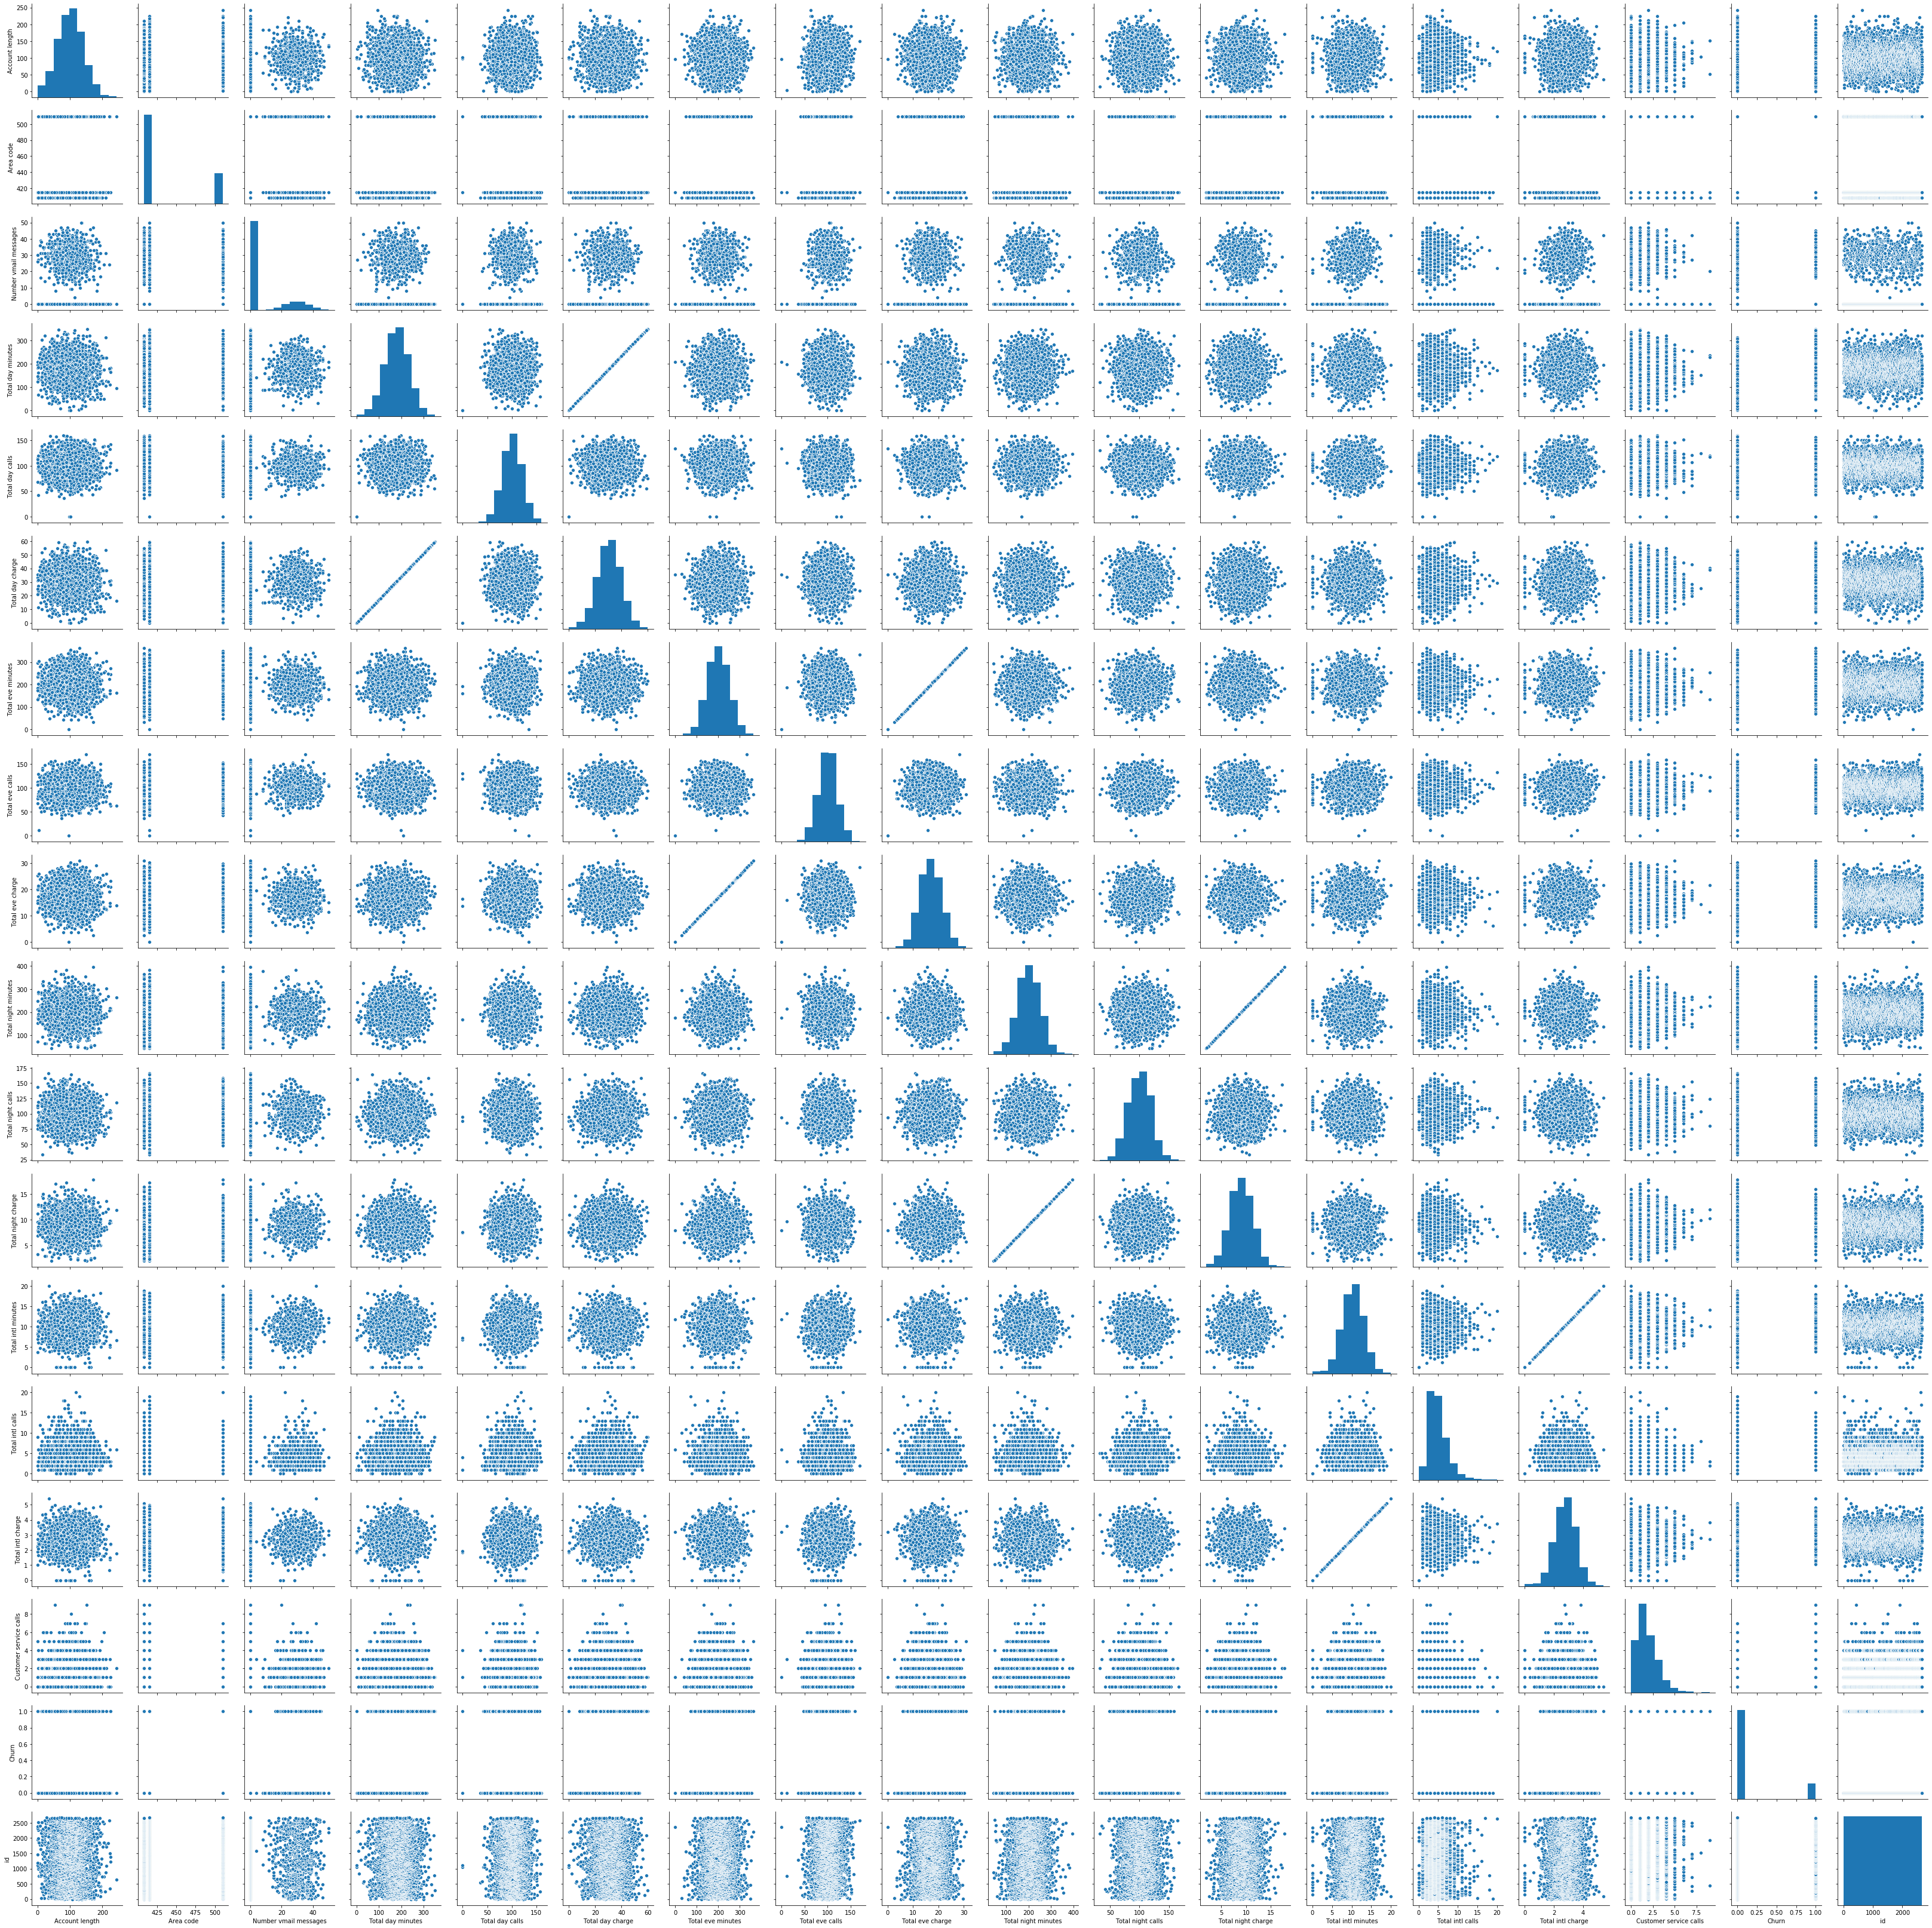

In [34]:
#Lets display variables against each other to see if some of them are corrolated linearly
sns.pairplot(customers)

### people that are using the most the service tend to churn

In [ ]:
sns.boxplot(x="Churn", y='Total day minutes', data=customers)

## Segmentation of the customers churning to get insights on why they are churning

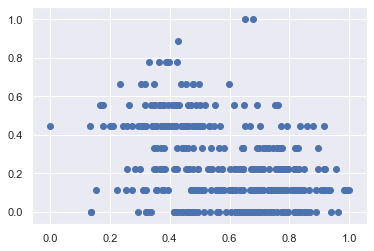

In [214]:
customers2 = customers.loc[customers['Churn']== 1.0]

In [215]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [216]:
y_predicted = km.fit_predict(customers2[['Total day minutes','Customer service calls','Total intl minutes']])

[1 0 2 1 1 1 0 1 2 1 0 0 2 0 1 1 2 0 1 0 2 0 0 2 2 1 0 0 0 0 1 0 1 0 0 2 2
 0 2 1 0 2 0 0 0 0 2 0 1 2 2 1 0 1 1 1 0 2 2 0 0 2 0 0 0 0 0 0 0 1 2 0 2 0
 0 0 2 2 0 0 2 1 0 0 1 1 0 2 1 0 2 1 0 0 0 0 0 2 0 1 1 2 2 2 1 0 1 1 1 0 1
 0 0 0 1 2 0 1 1 0 2 1 0 1 2 2 1 0 0 1 1 2 0 0 0 1 1 0 2 2 2 2 2 0 2 1 0 0
 0 1 2 0 0 1 1 2 0 0 0 1 1 0 2 1 0 0 0 1 1 0 1 0 0 0 2 2 2 2 0 1 2 0 2 0 2
 2 1 2 0 1 0 2 0 1 0 0 1 0 2 0 0 0 0 1 1 0 2 2 1 0 0 2 0 0 0 2 0 0 0 1 0 0
 2 0 1 0 2 2 0 2 0 0 0 2 2 0 2 1 1 0 2 0 1 1 0 1 0 1 0 1 1 2 0 1 0 2 1 0 1
 0 0 0 1 0 2 0 1 2 1 1 1 0 2 1 1 1 2 2 0 0 0 0 2 1 0 0 0 2 2 0 1 0 0 0 0 0
 2 2 0 0 0 0 2 0 0 0 0 0 1 2 2 0 0 1 2 1 1 0 0 2 1 1 2 2 2 0 0 2 1 0 2 2 0
 0 0 2 1 1 1 0 0 0 2 1 0 2 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 2 0 1 0 0 1 0 1 0
 0 2 0 0 0 0 1 2 1 0 0 1 1 2 1 1 0 1]


In [217]:
customers2['cluster']= y_predicted
customers2.head()

/Users/gaetanbrison/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



State  Account length  Area code International plan Voice mail plan  \
18    CO              77        408                 No              No   
28    AZ              12        408                 No              No   
35    MD             135        408                Yes             Yes   
45    WY              87        415                 No              No   
48    CO             121        408                 No             Yes   

    Number vmail messages  Total day minutes  Total day calls  \
18                      0           0.177879               89   
28                      0           0.711517              118   
35                     41           0.493444               85   
45                      0           0.430445               83   
48                     30           0.565564              129   

    Total day charge  Total eve minutes  ...  Total night minutes  \
18             10.61              169.9  ...                209.6   
28             42.43              252.4  ...                280.2   
35             29.43              203.9  ...                122.2   
45             25.67              219.7  ...                203.9   
48             33.73               75.3  ...                181.2   

    Total night calls  Total night charge  Total intl minutes  \
18                 64                9.43               0.285   
28                 90               12.61               0.590   
35                 78                5.50               0.730   
45                127                9.18               0.485   
48                 77                8.15               0.290   

    Total intl calls  Total intl charge  Customer service calls  Churn  \
18                 6               1.54                0.555556      1   
28                 3               3.19                0.111111      1   
35                15               3.94                0.000000      1   
45                 3               2.62                0.555556      1   
48                 3               1.57                0.333333      1   

    cluster  id  
18        1  18  
28        0  28  
35        2  35  
45        1  45  
48        1  48  

[5 rows x 22 columns]

In [219]:
df_customers0 = customers2[customers2.cluster==0]
df_customers1 = customers2[customers2.cluster==1]
df_customers2 = customers2[customers2.cluster==2]

No handles with labels found to put in legend.


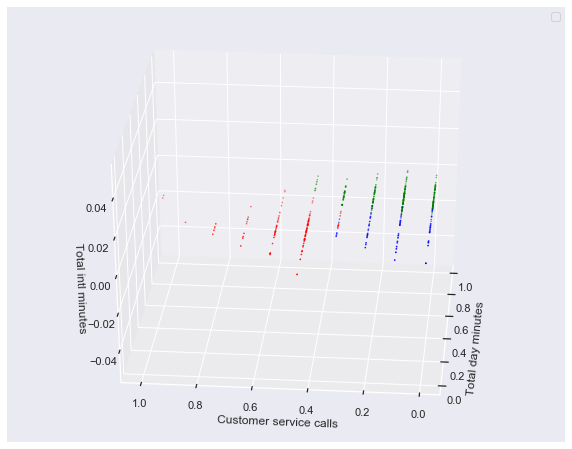

In [220]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(df_customers0['Total day minutes'],df_customers0['Customer service calls'],df_customers0['Total intl minutes'],color='green')
plt.scatter(df_customers1['Total day minutes'],df_customers1['Customer service calls'],df_customers0['Total intl minutes'],color='red')
plt.scatter(df_customers2['Total day minutes'],df_customers2['Customer service calls'],df_customers0['Total intl minutes'],color='blue')
ax.view_init(30, 185)


plt.xlabel('Total day minutes')
plt.ylabel('Customer service calls')
ax.set_zlabel('Total intl minutes')

plt.legend()
plt.show()





### people that tends to churn are the one using the most the service, that are calling most of the time the customer service , that are calling the most at the level of the international

Let's look at our correlation ! 

# III) Algorithms to predict Churn

## Logistic Regression one of the best way to predict binary output

In [78]:
train = data

In [79]:
train.shape

(2666, 13)

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Churn',axis=1), 
                                                    train['Churn'], test_size=0.30, 
                                                    random_state=101)

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
logmodel = LogisticRegression(solver="liblinear")
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
predictions = logmodel.predict(X_test)

In [85]:
from sklearn.metrics import classification_report

In [86]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       667
           1       0.43      0.02      0.04       133

    accuracy                           0.83       800
   macro avg       0.63      0.51      0.48       800
weighted avg       0.77      0.83      0.76       800



In [87]:
pd.DataFrame(zip(X_train.columns, logmodel.coef_[0]))

0         1
0           Account length  0.001772
1    Number vmail messages -0.026646
2          Total day calls -0.003694
3         Total day charge  0.061709
4         Total eve charge  0.027257
5        Total night calls -0.004032
6       Total night charge  0.034129
7         Total intl calls -0.153548
8        Total intl charge  0.305161
9   Customer service calls  2.944071
10                area_415 -0.009730
11                area_510 -0.026723

What insights can we gain from this ? Maybe:
* Long international calls (<=> charge) predict churning, but frequency of international calls is associated to not churning ? 

It would be useful to have standard errors to assess more precisely the impact of these variables.

**TODO**: passer sur statsmodels pour avoir les standard errors ? 

## KNN prediction for the churn part 

In [89]:
scaler = StandardScaler()

In [90]:
scaler.fit(new_customer_table.drop('Churn',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [91]:

scaled_features = scaler.transform(new_customer_table.drop('Churn',axis=1))

In [92]:
df_feat = pd.DataFrame(scaled_features,columns=new_customer_table.columns[:-1])
df_feat.head()


id  Account length  Area code  Number vmail messages  \
0 -1.731401        0.692163  -0.527811               1.247508   
1 -1.730102        0.161278  -0.527811               1.320985   
2 -1.728803        0.919686  -0.527811              -0.589414   
3 -1.727503       -0.420168  -0.692467              -0.589414   
4 -1.726204       -0.647691  -0.527811              -0.589414   

   Total day minutes  Total day calls  Total day charge  Total eve minutes  \
0           1.579670         0.484868          1.579942          -0.058619   
1          -0.329918         1.135375         -0.330194          -0.095916   
2           1.179302         0.685024          1.179465          -1.554439   
3           2.212509        -1.466653          2.212675          -2.718509   
4          -0.235822         0.634985         -0.235772          -1.022461   

   Total eve charge  Total night minutes  Total night calls  \
0         -0.058445             0.857403          -0.469031   
1         -0.095397             1.048458           0.149054   
2         -1.554963            -0.759668           0.200561   
3         -2.718922            -0.084083          -0.572045   
4         -1.021482            -0.281046           1.076181   

   Total night charge  Total intl minutes  Total intl calls  \
0            0.856707           -0.085020         -0.597527   
1            1.049293            1.242179         -0.597527   
2           -0.758391            0.704125          0.216894   
3           -0.084339           -1.304609          1.031314   
4           -0.281303           -0.049150         -0.597527   

   Total intl charge  Customer service calls  
0          -0.085681               -0.429172  
1           1.242921               -0.429172  
2           0.698194               -1.191955  
3          -1.307995                0.333610  
4          -0.045823                1.096392

In [93]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,new_customer_table['Churn'],
                                                    test_size=0.30)

In [94]:
knn = KNeighborsClassifier(n_neighbors=1)

In [95]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [96]:
pred = knn.predict(X_test)

In [97]:
print(confusion_matrix(y_test,pred))

[[630  63]
 [ 71  36]]


In [98]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       693
           1       0.36      0.34      0.35       107

    accuracy                           0.83       800
   macro avg       0.63      0.62      0.63       800
weighted avg       0.83      0.83      0.83       800



In [99]:
#Use the elbow method to pick a good K Value:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

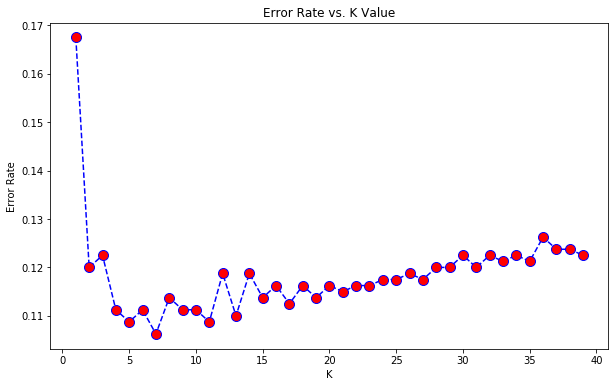

In [100]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [101]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[630  63]
 [ 71  36]]


              precision    recall  f1-score   support

           0       0.90      0.91      0.90       693
           1       0.36      0.34      0.35       107

    accuracy                           0.83       800
   macro avg       0.63      0.62      0.63       800
weighted avg       0.83      0.83      0.83       800



In [102]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[693   0]
 [ 93  14]]


              precision    recall  f1-score   support

           0       0.88      1.00      0.94       693
           1       1.00      0.13      0.23       107

    accuracy                           0.88       800
   macro avg       0.94      0.57      0.58       800
weighted avg       0.90      0.88      0.84       800



### we can see that our result in terms of prediction is really good which means taht we have the right algorithm to predict churn

# Dataset 2: I) Data Preparation

this dataset is more for the explanation of when the customer is going to churn what are the personnal customer characteristics that make him a churner

In [37]:
df_data_2.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

lets see the difference between churners and none

In [40]:
dataChurn=df_data_2[df_data_2['Churn'] == 'Yes']
dataChurn.shape
dataChurn.describe()

SeniorCitizen       tenure  MonthlyCharges
count    1869.000000  1869.000000     1869.000000
mean        0.254682    17.979133       74.441332
std         0.435799    19.531123       24.666053
min         0.000000     1.000000       18.850000
25%         0.000000     2.000000       56.150000
50%         0.000000    10.000000       79.650000
75%         1.000000    29.000000       94.200000
max         1.000000    72.000000      118.350000

In [43]:
dataNotChurn=df_data_2[df_data_2['Churn'] != 'True']
dataNotChurn.shape
dataNotChurn.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

from taht we can see that people that are churning are not seniors with long tenure in the company which means structural problem or not competitive
with lower charges and with partners and dependents so maybe work on a family offer who asked for more tech support people most clients do not reconduct there subscription

This dataset can be used to gain a better understanding of customer profiles and corresponding plans and behaviours. 

In [105]:
df_data_2 = df_data_2.drop("customerID",1)
df_data_2 = df_data_2.where(df_data_2!=' ', np.nan)
df_data_2["TotalCharges"] = df_data_2["TotalCharges"].astype(float)
df_data_2 = df_data_2.dropna()

/Users/gaetanbrison/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [106]:
df_data_2.shape

(7032, 20)

Analysis on +7K customers.

In [107]:
factors = df_data_2.loc[:, ~((df_data_2.dtypes == int) | (df_data_2.dtypes == float))]

In [108]:
factors.describe()

gender Partner Dependents PhoneService MultipleLines InternetService  \
count    7032    7032       7032         7032          7032            7032   
unique      2       2          2            2             3               3   
top      Male      No         No          Yes            No     Fiber optic   
freq     3549    3639       4933         6352          3385            3096   

       OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
count            7032         7032             7032        7032        7032   
unique              3            3                3           3           3   
top                No           No               No          No          No   
freq             3497         3087             3094        3472        2809   

       StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
count             7032            7032             7032              7032   
unique               3               3                2                 4   
top                 No  Month-to-month              Yes  Electronic check   
freq              2781            3875             4168              2365   

       Churn  
count   7032  
unique     2  
top       No  
freq    5163

In [109]:
for var in factors.columns:
    print(var, factors.loc[:,var].unique())

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


#### Coding qualitatuve values
We make no distinction between "No internet service" and "No".
* **gender**: 
    * Female: 1
    * Male:0

In [110]:
df_data_2["Churn"] = (df_data_2.Churn == "Yes").astype(float)
df_data_2.groupby(by="PaymentMethod")["Churn"].mean()

PaymentMethod
Bank transfer (automatic)    0.167315
Credit card (automatic)      0.152531
Electronic check             0.452854
Mailed check                 0.192020
Name: Churn, dtype: float64

We will one group for "automatic" payments.

In [44]:
#doing it by hand because pd.get_dummies does not give us enough options
data2 = df_data_2.loc[:,(df_data_2.dtypes == int) | (df_data_2.dtypes == float)].copy(deep=True)

def get_trues(column, value):
    return (df_data_2[column] == value).astype(int)

data2["gender"] = get_trues("gender", "Female")
data2["partner"] = get_trues("Partner", "Yes")
data2["dependents"] = get_trues("Dependents", "Yes")
data2["phoneService"] = get_trues("PhoneService", "Yes")
data2["multipleLines"] = get_trues("MultipleLines", "Yes")
data2["internetServiceDSL"] = get_trues("InternetService", "DSL")
data2["internetServiceFiber"] = get_trues("InternetService", "Fiber optic")
data2["onlineSecurity"] = get_trues("OnlineSecurity", "Yes")
data2["onlineBackup"] = get_trues("OnlineBackup", "Yes")
data2["deviceProtection"] = get_trues("DeviceProtection","Yes")
data2["techSupport"] = get_trues("TechSupport", "Yes")
data2["streamTV"] = get_trues("StreamingTV", "Yes")
data2["streamMovies"] = get_trues("StreamingMovies", "Yes")
data2["subscribe1Y"] = get_trues("Contract", "One year")
data2["subscribe2Y"] = get_trues("Contract", "Two year")
data2["paperlessBilling"] = get_trues("PaperlessBilling", "Yes")
data2["paymentECheck"] = get_trues("PaymentMethod", "Electronic check")
data2["paymentMailedCheck"] = get_trues("PaymentMethod", "Mailed check")
data2.head(10)

SeniorCitizen  tenure  MonthlyCharges  gender  partner  dependents  \
0              0       1           29.85       1        1           0   
1              0      34           56.95       0        0           0   
2              0       2           53.85       0        0           0   
3              0      45           42.30       0        0           0   
4              0       2           70.70       1        0           0   
5              0       8           99.65       1        0           0   
6              0      22           89.10       0        0           1   
7              0      10           29.75       1        0           0   
8              0      28          104.80       1        1           0   
9              0      62           56.15       0        0           1   

   phoneService  multipleLines  internetServiceDSL  internetServiceFiber  ...  \
0             0              0                   1                     0  ...   
1             1              0                   1                     0  ...   
2             1              0                   1                     0  ...   
3             0              0                   1                     0  ...   
4             1              0                   0                     1  ...   
5             1              1                   0                     1  ...   
6             1              1                   0                     1  ...   
7             0              0                   1                     0  ...   
8             1              1                   0                     1  ...   
9             1              0                   1                     0  ...   

   onlineBackup  deviceProtection  techSupport  streamTV  streamMovies  \
0             1                 0            0         0             0   
1             0                 1            0         0             0   
2             1                 0            0         0             0   
3             0                 1            1         0             0   
4             0                 0            0         0             0   
5             0                 1            0         1             1   
6             1                 0            0         1             0   
7             0                 0            0         0             0   
8             0                 1            1         1             1   
9             1                 0            0         0             0   

   subscribe1Y  subscribe2Y  paperlessBilling  paymentECheck  \
0            0            0                 1              1   
1            1            0                 0              0   
2            0            0                 1              0   
3            1            0                 0              0   
4            0            0                 1              1   
5            0            0                 1              1   
6            0            0                 1              0   
7            0            0                 0              0   
8            0            0                 1              1   
9            1            0                 0              0   

   paymentMailedCheck  
0                   0  
1                   1  
2                   1  
3                   0  
4                   0  
5                   0  
6                   0  
7                   1  
8                   0  
9                   0  

[10 rows x 21 columns]

# II) Data Analysis

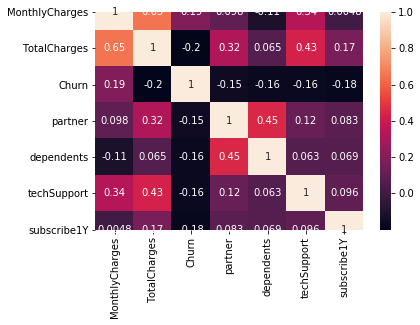

In [112]:
data3 = data2
data3 = data3[['MonthlyCharges','TotalCharges','Churn','partner','dependents','techSupport','subscribe1Y']]

sns.heatmap(data3.corr(),annot=True)

In [113]:
#Lets check what is the common trends in the people that are going to churn

In [114]:
data2.shape

(7032, 23)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(data2.drop("Churn", 1),data2['Churn'],
                                                    test_size=0.30)

In [141]:
model = sm.Logit(y_train, X_train)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.412811
         Iterations 8


In [142]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4900
Method:                           MLE   Df Model:                           21
Date:                Mon, 30 Mar 2020   Pseudo R-squ.:                  0.2873
Time:                        11:05:31   Log-Likelihood:                -2031.9
converged:                       True   LL-Null:                       -2850.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
SeniorCitizen            0.1831      0.102      1.802      0.072      -0.016       0.382
tenure                  -0.0681      0.007     -9.865      0.000      -0.082      -0.055
MonthlyCharges          -0.0571      0.038     -1.500      0.134      -0.132       0.018
TotalCharges             0.0004    7.9e-05      5.438      0.000       0.000       0.001
gender                  -0.0662      0.076     -0.866      0.386      -0.216       0.084
partner                 -0.0318      0.093     -0.343      0.732      -0.213       0.150
dependents              -0.1047      0.106     -0.984      0.325      -0.313       0.104
phoneService             0.1680      0.769      0.218      0.827      -1.339       1.675
multipleLines            0.5366      0.213      2.514      0.012       0.118       0.955
internetServiceDSL       1.9428      0.964      2.015      0.044       0.053       3.832
internetServiceFiber     4.1731      1.912      2.183      0.029       0.427       7.920
onlineSecurity          -0.2472      0.214     -1.154      0.248      -0.667       0.173
onlineBackup             0.1176      0.212      0.556      0.579      -0.297       0.532
deviceProtection         0.1790      0.213      0.842      0.400      -0.238       0.596
techSupport             -0.0982      0.218     -0.451      0.652      -0.525       0.328
streamTV                 0.7131      0.391      1.822      0.068      -0.054       1.480
streamMovies             0.7782      0.393      1.978      0.048       0.007       1.549
subscribe1Y             -0.6924      0.130     -5.334      0.000      -0.947      -0.438
subscribe2Y             -1.4889      0.216     -6.899      0.000      -1.912      -1.066
paperlessBilling         0.2807      0.088      3.185      0.001       0.108       0.453
paymentECheck            0.3290      0.090      3.664      0.000       0.153       0.505
paymentMailedCheck      -0.1078      0.111     -0.970      0.332      -0.326       0.110
========================================================================================
"""

In [143]:
logit_preds = result.predict(X_test)

In [144]:
mean_squared_error(y_test, logit_preds )

0.1380954763862868

In [145]:
r2_score(y_test, logit_preds)

0.2916879373048532

Not that bad! But in practice we'll need to put a threshold of probability above which we flag customers as "potentially churning". Let's look at the ROC curve.

In [146]:
print(roc_auc_score(y_test, logit_preds))
fpr, tpr, thresholds = roc_curve(y_test, logit_preds)

0.8396353686635947


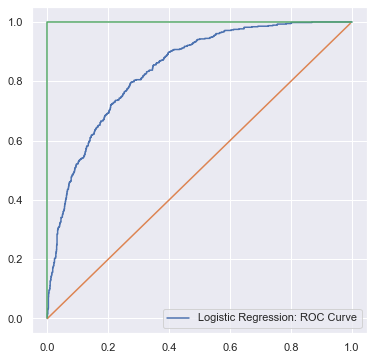

In [147]:
sns.set(style="darkgrid")

x = np.arange(0,1,0.005)
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr ,label="Logistic Regression: ROC Curve")
ax.plot(x,x)
ax.plot([0,0,1], [0,1,1])
ax.legend()
plt.show()

From a business point of view, preventing a churn is more important than retargeting a non-churning customer !  So maximizing the **tpr (sensitivity)** is more important to us.
<br> Based on the ROC-curve, a sensitivity of 0.8 seems like a good compromise. We would catch 80% of the would-be churners, and falsely predict ~25/30 % of not churners as churners.

In [148]:
sens = tpr[tpr > 0.8][0]
s = thresholds[np.where(tpr==sens)[0][0]]

In [149]:
s

0.2610828723989111

In [150]:
preds = (logit_preds > s).astype(int)

In [151]:
mean_squared_error(y_test, preds )

0.262085308056872

So, what are the important variables in our model ? 

Let's look for the significant variables.

In [152]:
table = StringIO(result.summary().tables[1].as_csv())
table = pd.read_csv(table)

In [153]:
alpha = 0.05
table.loc[table.iloc[:,4] < alpha]

coef      std err       z      P>|z|     [0.025   \
1   tenure                   -0.0681   0.007000     -9.865   0.000     -0.082   
3   TotalCharges              0.0004   0.000079      5.438   0.000      0.000   
8   multipleLines             0.5366   0.213000      2.514   0.012      0.118   
9   internetServiceDSL        1.9428   0.964000      2.015   0.044      0.053   
10  internetServiceFiber      4.1731   1.912000      2.183   0.029      0.427   
16  streamMovies              0.7782   0.393000      1.978   0.048      0.007   
17  subscribe1Y              -0.6924   0.130000     -5.334   0.000     -0.947   
18  subscribe2Y              -1.4889   0.216000     -6.899   0.000     -1.912   
19  paperlessBilling          0.2807   0.088000      3.185   0.001      0.108   
20  paymentECheck             0.3290   0.090000      3.664   0.000      0.153   

      0.975]   
1      -0.055  
3       0.001  
8       0.955  
9       3.832  
10      7.920  
16      1.549  
17     -0.438  
18     -1.066  
19      0.453  
20      0.505

So long time customers are actually **less** likely to churn  ! <br>
Unsurprinsingly, customers who have a subcription for 1/2 year(s) are also less likely to churn.

Having an internet subscription (at the operator) is associated with churning too ...